In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('C:/Users/user/1/Downloads/housing.csv/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.nunique()

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
median_house_value     3833
ocean_proximity           5
dtype: int64

### Exploratory Data Analysis

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

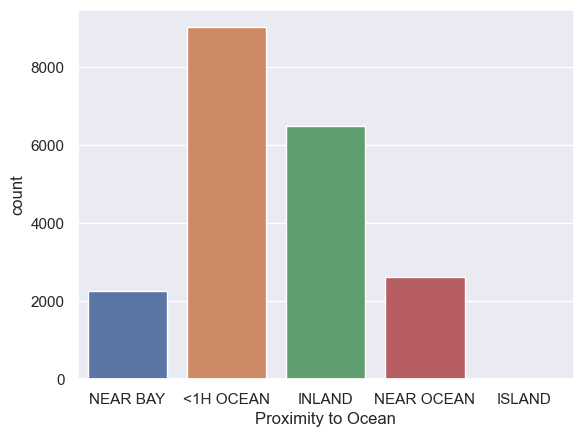

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


In [8]:
sns.countplot(x="ocean_proximity", data=df)
plt.xlabel("Proximity to Ocean")
plt.show()

print(df['ocean_proximity'].value_counts(ascending=False))

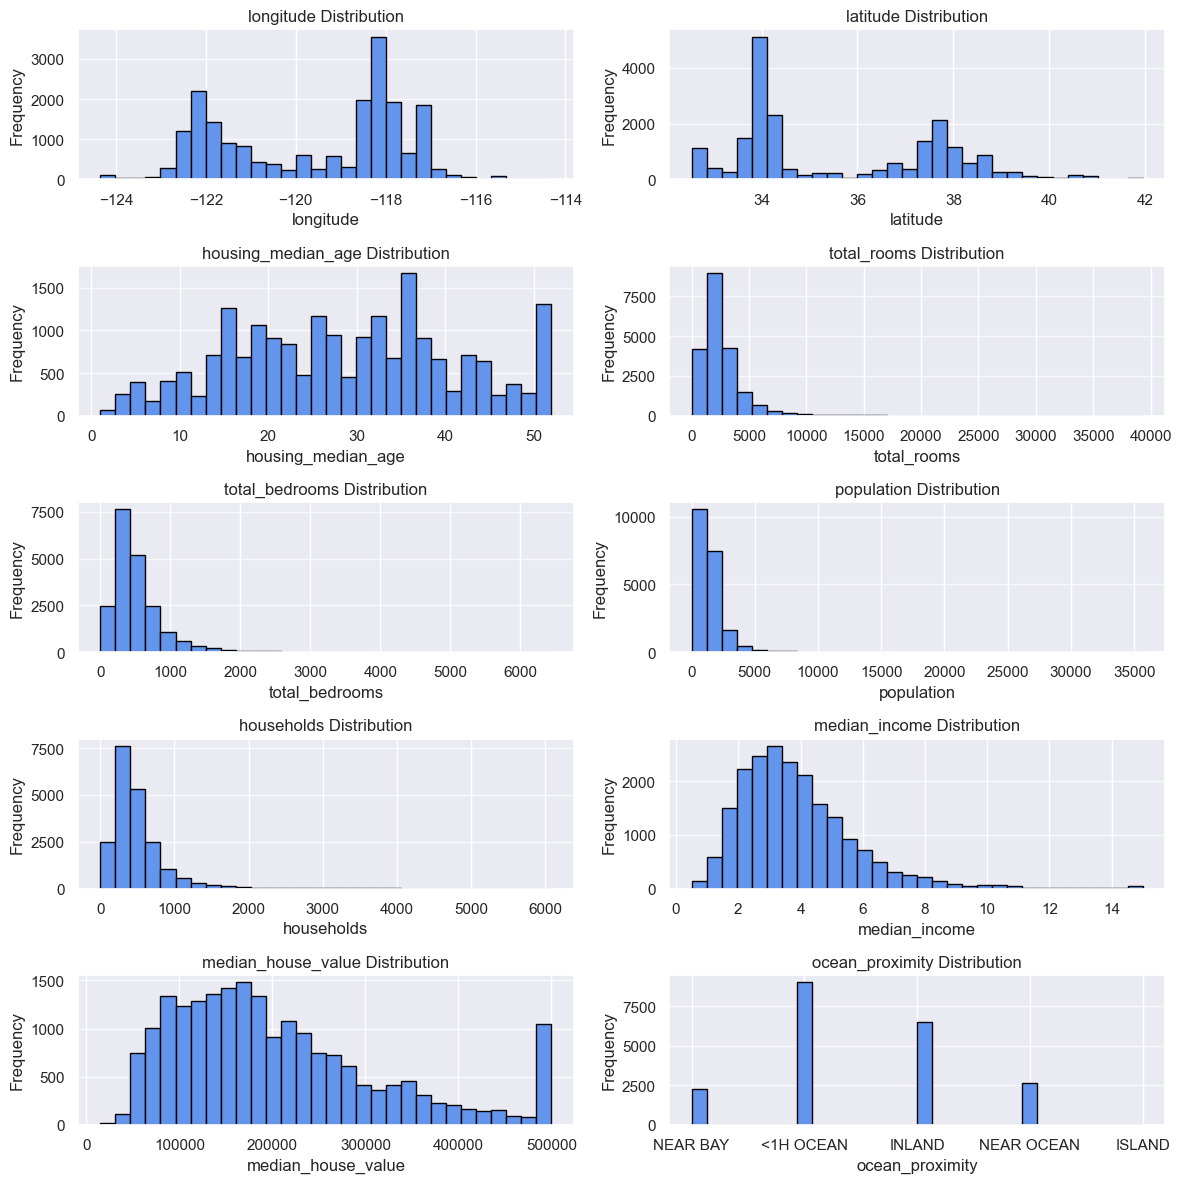

In [9]:
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=30, color='cornflowerblue', edgecolor='black')
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

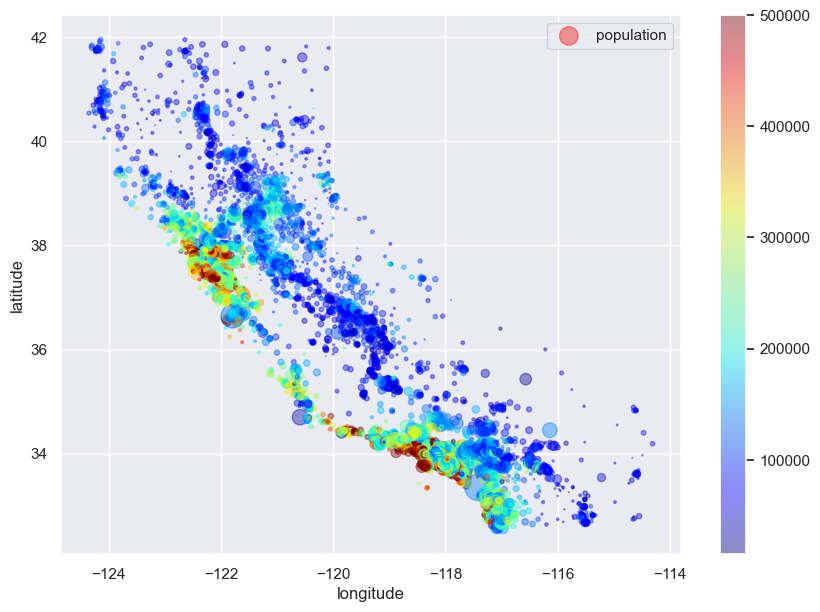

In [10]:
df.plot(kind = 'scatter', x ='longitude', y = 'latitude', alpha = 0.4,
              s = df["population"]/100, label = "population",figsize = (10,7),
             c = df['median_house_value'], cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()
plt.show()

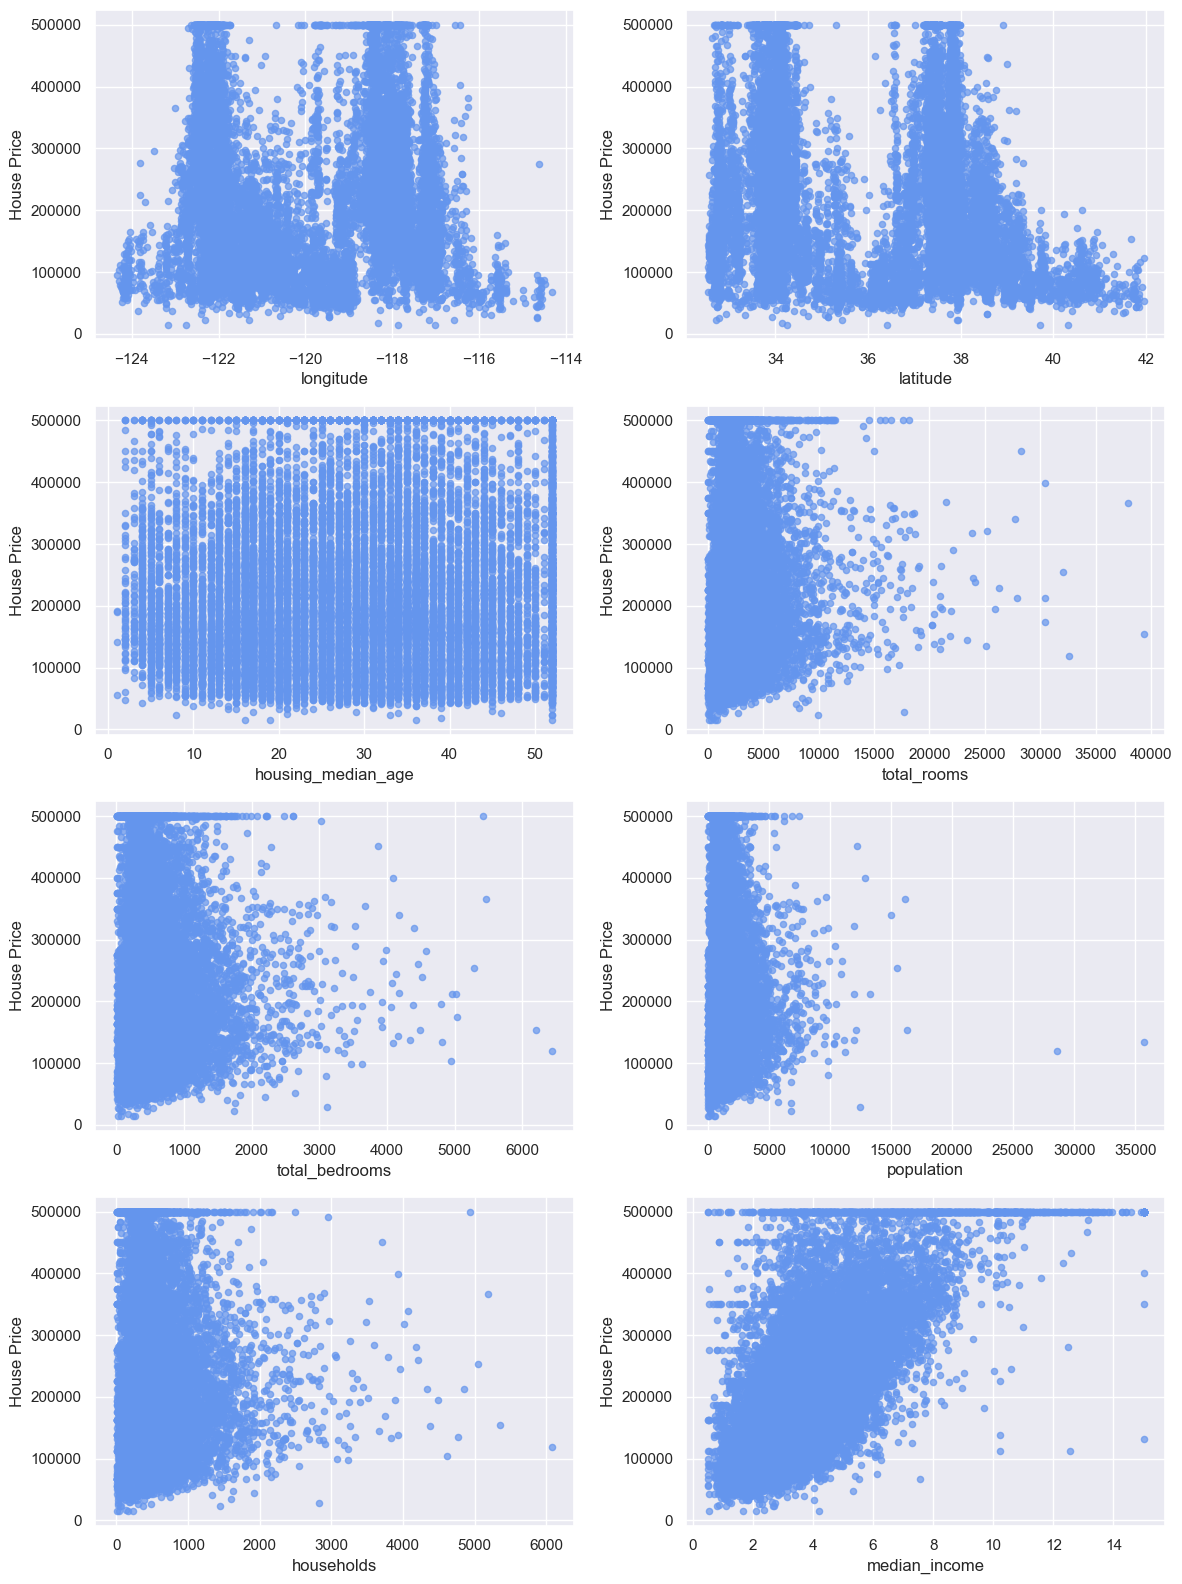

In [11]:
cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

sns.set(style='whitegrid')

for i, val in enumerate(cols):
    axes[i].scatter(df[val], df['median_house_value'], s=20, alpha=0.7, color='cornflowerblue')
    axes[i].set_xlabel(val)
    axes[i].set_ylabel('House Price')

plt.tight_layout()
plt.show()


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


In [13]:
df['total_rooms'] = np.log1p(df['total_rooms']) 
df['total_bedrooms'] = np.log1p(df['total_bedrooms']) 
df['population'] = np.log1p(df['population']) 
df['households'] = np.log1p(df['households']) 
df['median_income'] = np.log1p(df['median_income']) 
df['median_house_value'] = np.log1p(df['median_house_value']) 

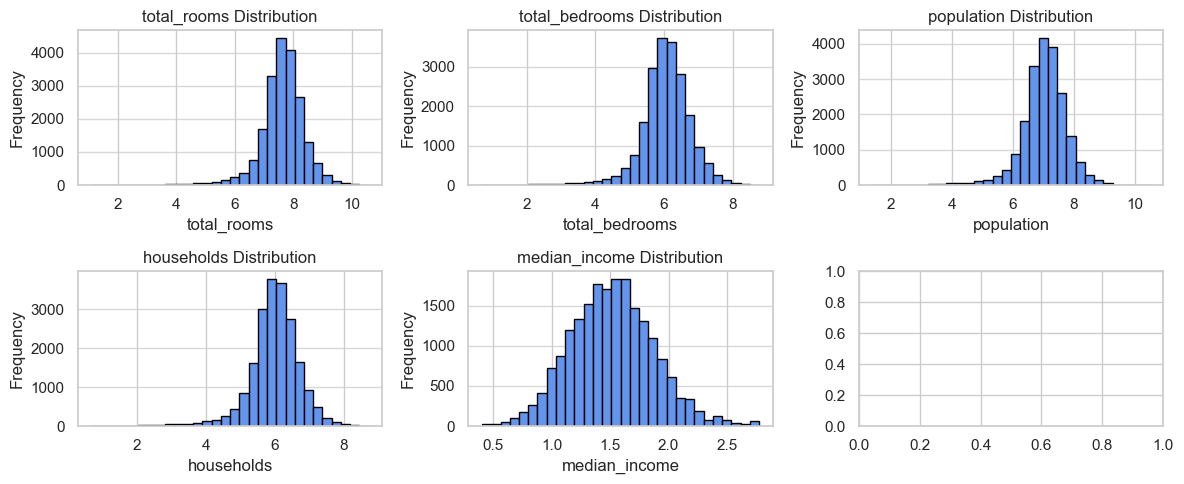

In [14]:
new_cols = ['total_rooms','total_bedrooms','population','households','median_income']
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))

axes = axes.flatten()

for i, column in enumerate(new_cols):
    axes[i].hist(df[column], bins=30, color='cornflowerblue', edgecolor='black')
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

In [15]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.029967,0.060817,0.109259,0.055823,-0.015737,-0.022855
latitude,-0.924616,1.000000,0.011899,-0.032552,-0.068248,-0.136543,-0.088207,-0.085637,-0.192770
housing_median_age,-0.109357,0.011899,1.000000,-0.313918,-0.272112,-0.243011,-0.241630,-0.137468,0.076550
total_rooms,0.029967,-0.032552,-0.313918,1.000000,0.945865,0.864580,0.931700,0.251910,0.185507
total_bedrooms,0.060817,-0.068248,-0.272112,0.945865,1.000000,0.897523,0.974593,0.014404,0.087665
population,0.109259,-0.136543,-0.243011,0.864580,0.897523,1.000000,0.932190,0.031790,0.025702
households,0.055823,-0.088207,-0.241630,0.931700,0.974593,0.932190,1.000000,0.046944,0.112815
median_income,-0.015737,-0.085637,-0.137468,0.251910,0.014404,0.031790,0.046944,1.000000,0.681618
median_house_value,-0.022855,-0.192770,0.076550,0.185507,0.087665,0.025702,0.112815,0.681618,1.000000


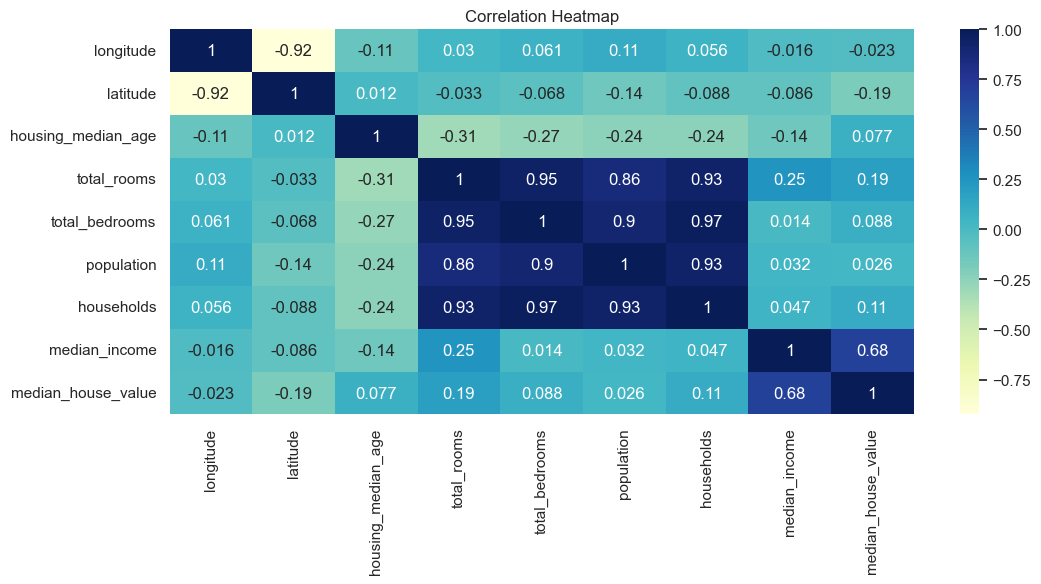

In [16]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

### Dummy Variables

In [17]:
dummies = pd.get_dummies(df['ocean_proximity'], drop_first=True)
df_dummies = df.join(dummies).drop('ocean_proximity', axis=1)
df_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154,0,0,1,0


### Standarization

In [18]:
df_dummies.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [19]:
cols_for_scale = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

In [20]:
scaler = StandardScaler()

df_dummies[cols_for_scale] = scaler.fit_transform(df_dummies[cols_for_scale])
df_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-1.130950,-1.633628,-1.694198,-1.568921,1.995330,1.647734,0,0,1,0
1,-1.322323,1.042355,-0.606210,1.650545,1.313730,1.030718,1.449247,1.988205,1.238251,0,0,1,0
2,-1.332305,1.037674,1.855769,-0.450371,-1.104202,-1.108938,-1.104448,1.656240,1.206604,0,0,1,0
3,-1.337296,1.037674,1.855769,-0.638250,-0.813084,-0.949279,-0.812988,1.049692,1.151873,0,0,1,0
4,-1.337296,1.037674,1.855769,-0.312480,-0.572930,-0.932378,-0.583151,0.170299,1.156500,0,0,1,0


### Train Test Splitting

In [21]:
X = df_dummies.drop('median_house_value', axis=1)
y = df_dummies['median_house_value']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=365)

### Linear Regression Model 1

In [23]:
reg = LinearRegression()
reg1 = reg.fit(X_train, y_train)

In [24]:
inter = reg1.intercept_
coef = reg1.coef_

print(f'Intercept: {inter}')
print("")
print(f'Coefficient Array: {coef}')

Intercept: 0.16556632174174288

Coefficient Array: [-0.58419184 -0.61435921  0.06155639 -0.33917119  0.6078191  -0.50388686
  0.25055874  0.65923893 -0.44673603  0.74524255 -0.08757985 -0.09972214]


In [25]:
coef_table = {}
for i in range(len(df_dummies.columns)-1):
    coef_table[df_dummies.columns[i]] = coef[i]
coef_table_df = pd.DataFrame([coef_table]).T.reset_index()
coef_table_df.columns = ['Feature', 'Coefficient']
coef_table_df

,Feature,Coefficient
0,longitude,-0.584192
1,latitude,-0.614359
2,housing_median_age,0.061556
3,total_rooms,-0.339171
4,total_bedrooms,0.607819
5,population,-0.503887
6,households,0.250559
7,median_income,0.659239
8,median_house_value,-0.446736
9,INLAND,0.745243


### Model Evaluation

In [26]:
reg_score = reg1.score(X_train, y_train)
print(f'R squared = {reg_score:.2f}')

R squared = 0.70


In [27]:
y_pred1 = reg1.predict(X_test)

In [28]:
reg_mse = mean_squared_error(y_test, y_pred1)
reg_mae = mean_absolute_error(y_test, y_pred1)
reg_rmse = np.sqrt(reg_mse)

print(f'Mean Squared Error : {reg_mse:.3f}')
print("")
print(f'Mean Absolute Error : {reg_mae:.3f}')
print("")
print(f'Root Mean Squared Error : {reg_rmse:.3f}')

Mean Squared Error : 0.296

Mean Absolute Error : 0.409

Root Mean Squared Error : 0.544


In [29]:
df_dummies['median_house_value'].describe()

count    2.043300e+04
mean    -1.352024e-15
std      1.000024e+00
min     -4.337746e+00
25%     -6.918237e-01
50%      2.491305e-02
75%      7.053481e-01
max      1.822717e+00
Name: median_house_value, dtype: float64

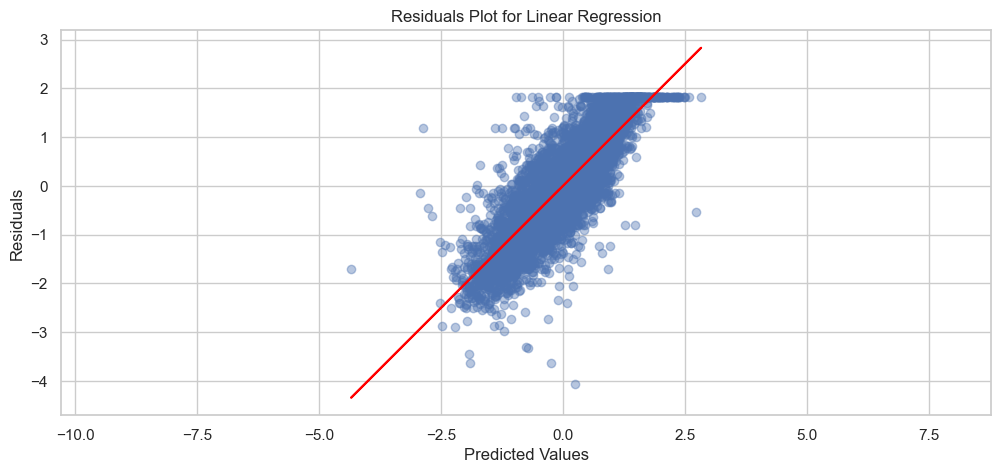

In [30]:
residuals = y_test - y_pred1

sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))
plt.axis('equal')
plt.scatter(x=y_pred1, y=y_test, alpha =0.4)
plt.plot(y_pred1, y_pred1, color='red')
plt.title("Residuals Plot for Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

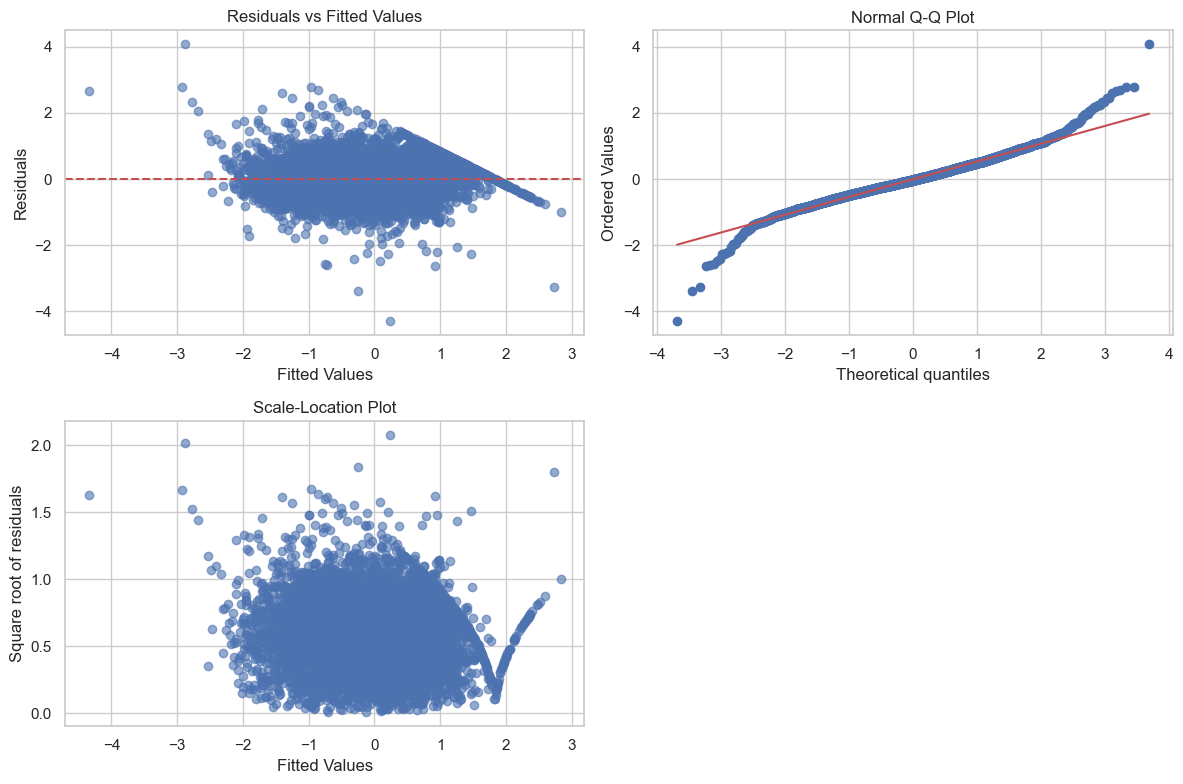

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_pred1.flatten(), residuals.values.flatten(), color="b", alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.subplot(2, 2, 2)
stats.probplot(residuals.values.flatten(), dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

plt.subplot(2, 2, 3)
plt.scatter(y_pred1.flatten(), np.sqrt(np.abs(residuals.values.flatten())), color="b", alpha=0.6)
plt.title("Scale-Location Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Square root of residuals")

plt.tight_layout()
plt.show()

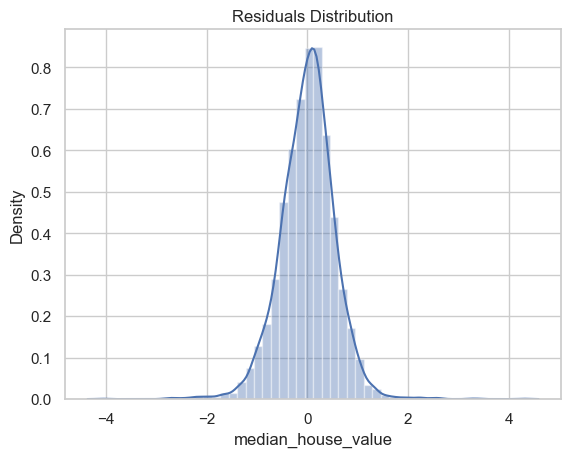

In [36]:
residuals = y_pred1 - y_test
sns.distplot(residuals)
plt.title('Residuals Distribution')
plt.show()

              Variable        VIF
0            longitude  17.073499
1             latitude  18.036678
2   housing_median_age   1.298617
3          total_rooms  25.927326
4       total_bedrooms  40.503002
5           population   8.361032
6           households  33.248671
7        median_income   2.923143
8               INLAND   2.019988
9               ISLAND   1.003351
10            NEAR BAY   1.440816
11          NEAR OCEAN   1.217027


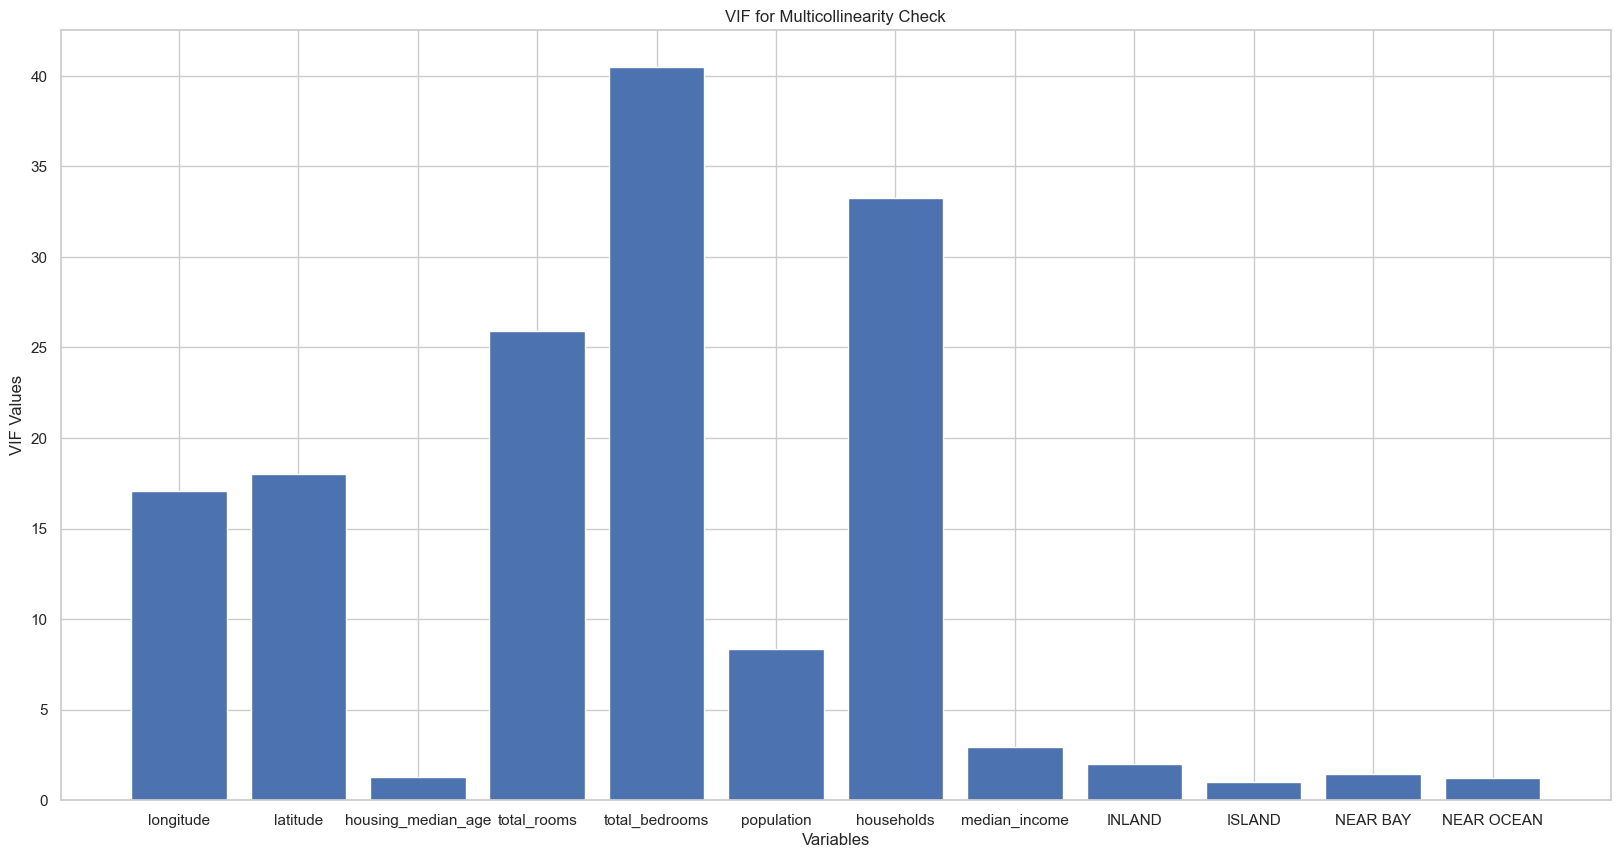

In [37]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

# Plot VIF values
plt.figure(figsize=(20, 10))
plt.bar(vif_data["Variable"], vif_data["VIF"])
plt.xlabel("Variables")
plt.ylabel("VIF Values")
plt.title("VIF for Multicollinearity Check")
plt.show()

### Because of the high correlation in latitude and longitude features, we will remove the one of them (latitude)

In [38]:
df_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-1.130950,-1.633628,-1.694198,-1.568921,1.995330,1.647734,0,0,1,0
1,-1.322323,1.042355,-0.606210,1.650545,1.313730,1.030718,1.449247,1.988205,1.238251,0,0,1,0
2,-1.332305,1.037674,1.855769,-0.450371,-1.104202,-1.108938,-1.104448,1.656240,1.206604,0,0,1,0
3,-1.337296,1.037674,1.855769,-0.638250,-0.813084,-0.949279,-0.812988,1.049692,1.151873,0,0,1,0
4,-1.337296,1.037674,1.855769,-0.312480,-0.572930,-0.932378,-0.583151,0.170299,1.156500,0,0,1,0


In [39]:
X = df_dummies.drop(['latitude','median_house_value'], axis=1)
y = df_dummies['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 365)

reg = LinearRegression()
reg2 =  reg.fit(X_train, y_train)
print(f'Intercept : {reg2.intercept_}')
print(f'Coefficients Array : {reg2.coef_}')
print("")
print(f'R squared : {reg2.score(X_train, y_train):.3f}')
y_pred2 = reg2.predict(X_test)

reg2_mse = mean_squared_error(y_test, y_pred2)
reg2_mae = mean_absolute_error(y_test, y_pred2)
reg2_rmse = np.sqrt(reg2_mse)

print(f'Mean Squared Error: {reg2_mse:.3f}')
print(f'Mean Absolute Error: {reg2_mae:.3f}')
print(f'Root Mean Squared Error: {reg2_rmse}')

Intercept : 0.25264897439439127
Coefficients Array : [-0.02432819  0.07578681 -0.44597797  0.56660522 -0.46490439  0.36512664
  0.70546058 -0.7714669   1.03419361 -0.06216782 -0.00229211]

R squared : 0.683
Mean Squared Error: 0.308
Mean Absolute Error: 0.419
Root Mean Squared Error: 0.5549134321053192


              Variable        VIF
0            longitude   1.309211
1   housing_median_age   1.282252
2          total_rooms  24.647721
3       total_bedrooms  40.500110
4           population   8.260526
5           households  32.430423
6        median_income   2.699682
7               INLAND   1.285562
8               ISLAND   1.001846
9             NEAR BAY   1.357867
10          NEAR OCEAN   1.018385


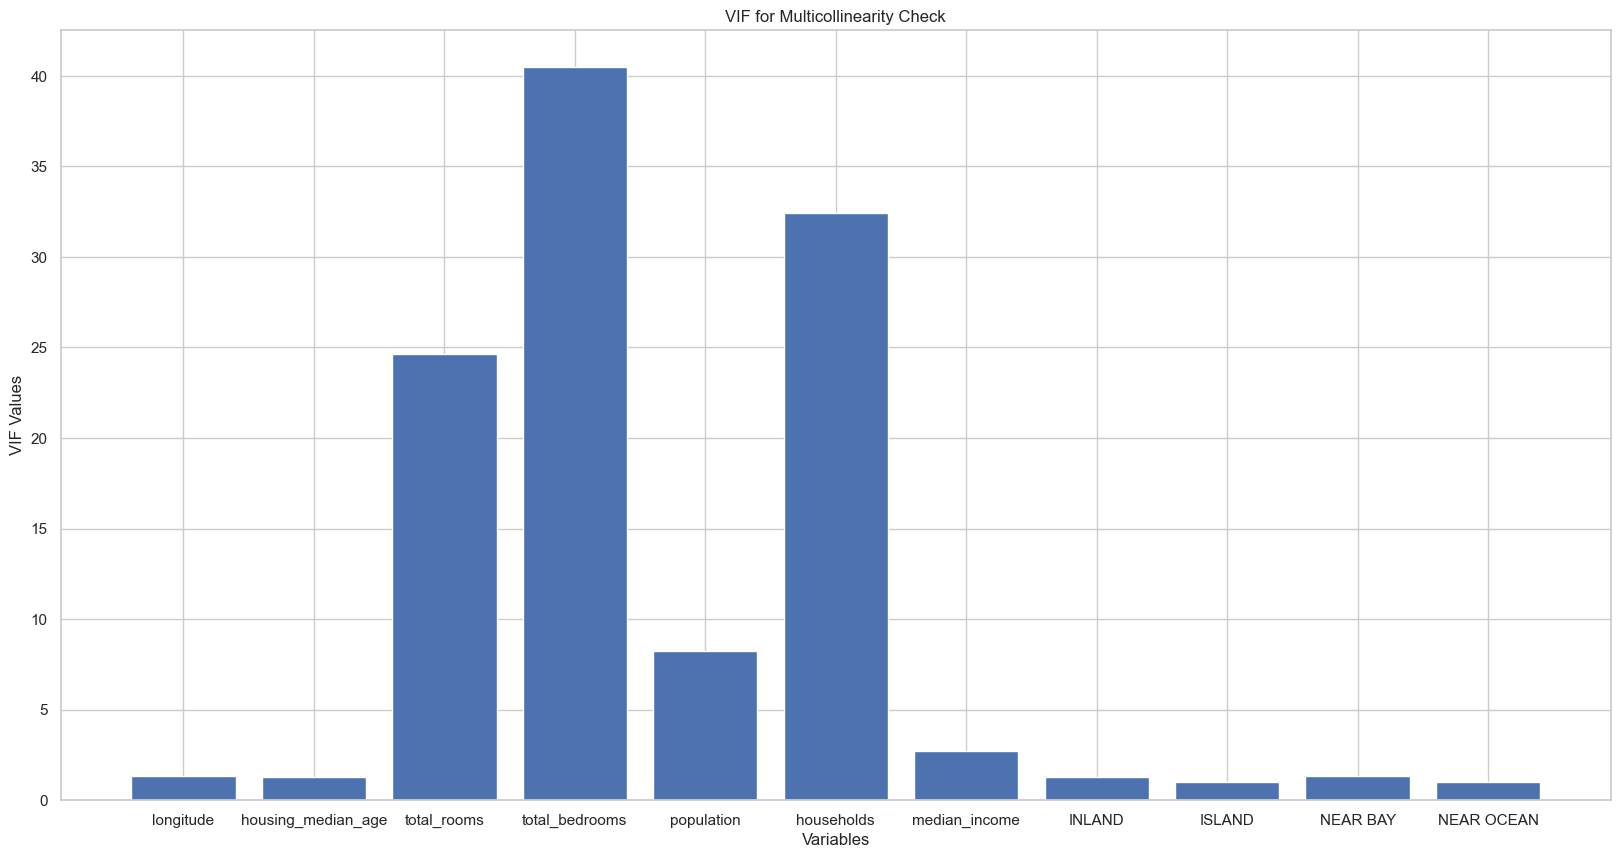

In [40]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

# Plot VIF values
plt.figure(figsize=(20, 10))
plt.bar(vif_data["Variable"], vif_data["VIF"])
plt.xlabel("Variables")
plt.ylabel("VIF Values")
plt.title("VIF for Multicollinearity Check")
plt.show()

### We observe that the VIF of the longitude reduced significantlly because we remove the latitude feature that are highly correlated with each other.We have 3 features that have high correlation with each other as well.

### We will remove the features : total_bedrooms, households and population

In [41]:
X = df_dummies.drop(['latitude','median_house_value','total_bedrooms','households','population'], axis=1)
y = df_dummies['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 365)

reg = LinearRegression()
reg3 =  reg.fit(X_train, y_train)
coef = reg3.coef_
print(f'Intercept : {reg3.intercept_}')
print(f'Coefficients Array : {reg3.coef_}')
print("")
reg_score = reg3.score(X_train, y_train)
print(f' R squared : {reg3.score(X_train, y_train):.3f}')
y_pred3 = reg3.predict(X_test)

reg3_mse = mean_squared_error(y_test, y_pred3)
reg3_mae = mean_absolute_error(y_test, y_pred3)
reg3_rmse = np.sqrt(reg3_mse)
print(f'Mean Squared Error: {reg3_mse:.3f}')
print(f'Mean Absolute Error: {reg3_mae:.3f}')
print(f'Root Mean Squared Error: {reg3_rmse:.3f}')

Intercept : 0.26511149439389525
Coefficients Array : [-0.03219879  0.07225943  0.05632863  0.57816223 -0.85947126  1.32661542
  0.0117032   0.05287066]

 R squared : 0.641
Mean Squared Error: 0.356
Mean Absolute Error: 0.457
Root Mean Squared Error: 0.596


In [42]:
coef_table = {}
for i in range(len(X.columns)):
    coef_table[X.columns[i]] = coef[i]
coef_table_df = pd.DataFrame([coef_table]).T.reset_index()
coef_table_df.columns = ['Feature', 'Coefficient']
coef_table_df

,Feature,Coefficient
0,longitude,-0.032199
1,housing_median_age,0.072259
2,total_rooms,0.056329
3,median_income,0.578162
4,INLAND,-0.859471
5,ISLAND,1.326615
6,NEAR BAY,0.011703
7,NEAR OCEAN,0.052871


             Variable       VIF
0           longitude  1.257792
1  housing_median_age  1.264616
2         total_rooms  1.170973
3       median_income  1.143495
4              INLAND  1.114251
5              ISLAND  1.000473
6            NEAR BAY  1.328657
7          NEAR OCEAN  1.003723


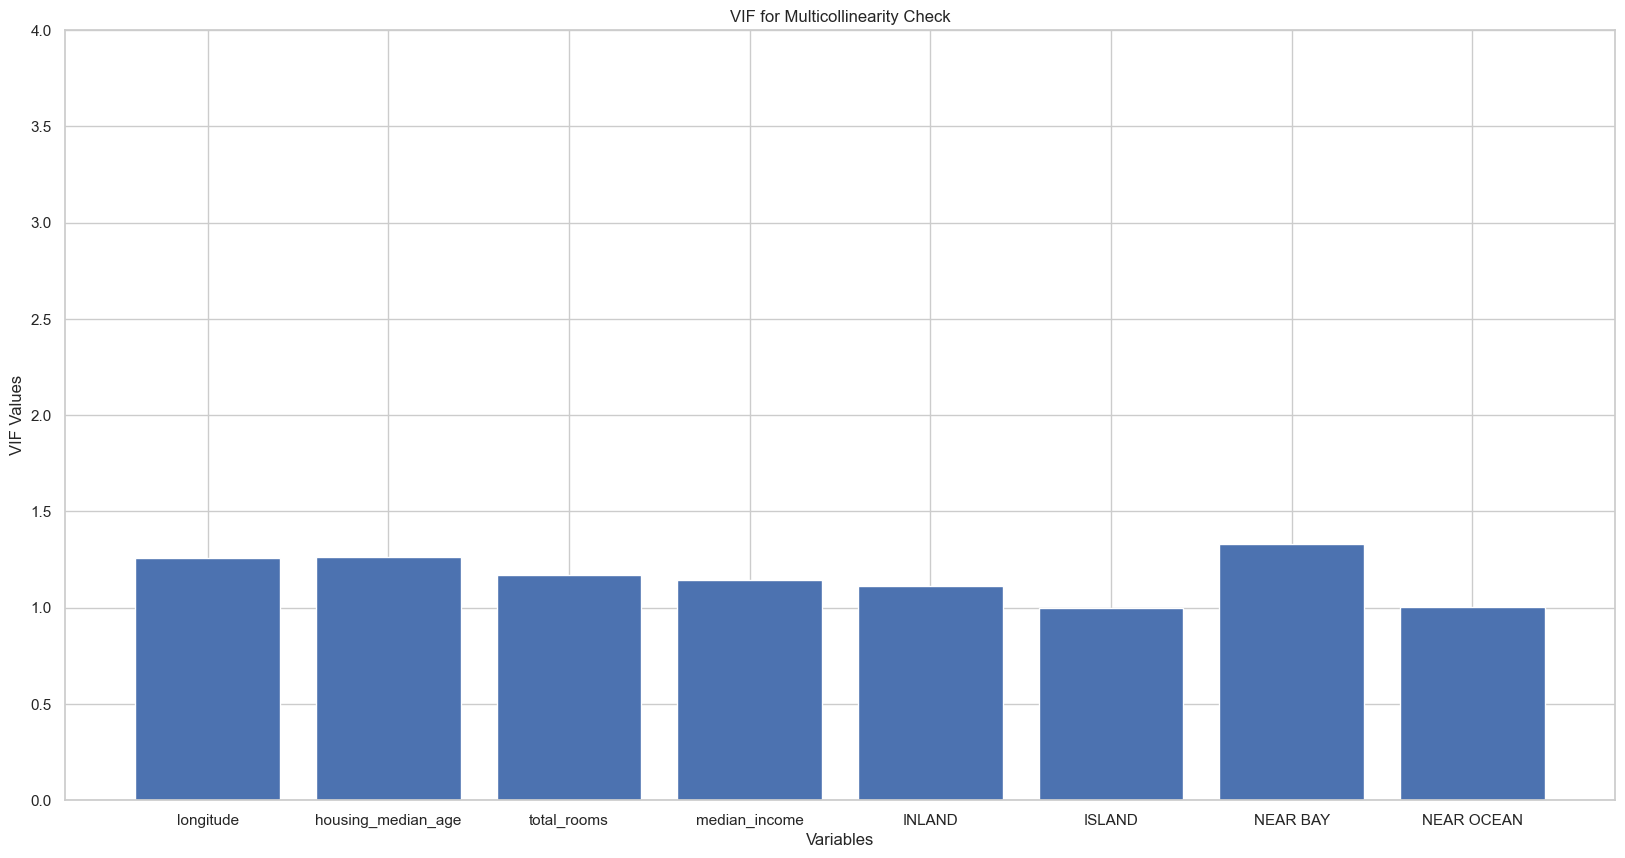

In [43]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

# Plot VIF values
plt.figure(figsize=(20, 10))
plt.bar(vif_data["Variable"], vif_data["VIF"])
plt.xlabel("Variables")
plt.ylim((0,4))
plt.ylabel("VIF Values")
plt.title("VIF for Multicollinearity Check")
plt.show()

### The error remained the same and the multicollinearity is reduced significantly.

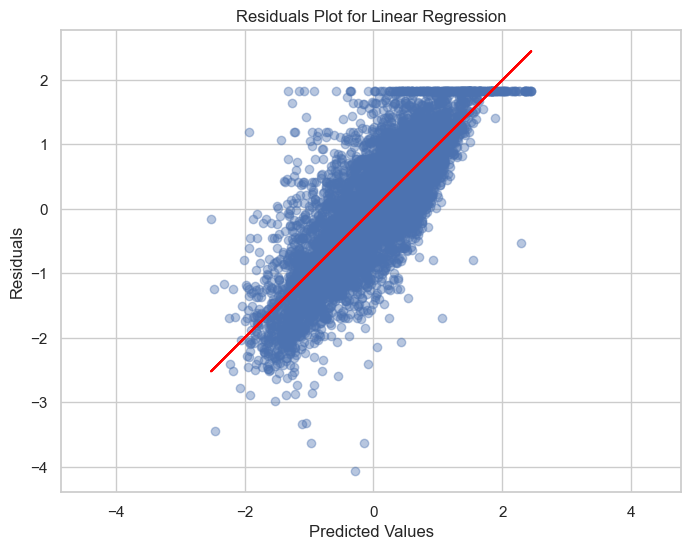

In [44]:
# Calculate residuals (errors)
residuals3 = y_test - y_pred3
# Plotting the residuals
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.axis('equal')
plt.scatter(x=y_pred3, y=y_test, alpha =0.4)
plt.plot(y_pred3, y_pred3, color='red')
plt.title("Residuals Plot for Linear Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

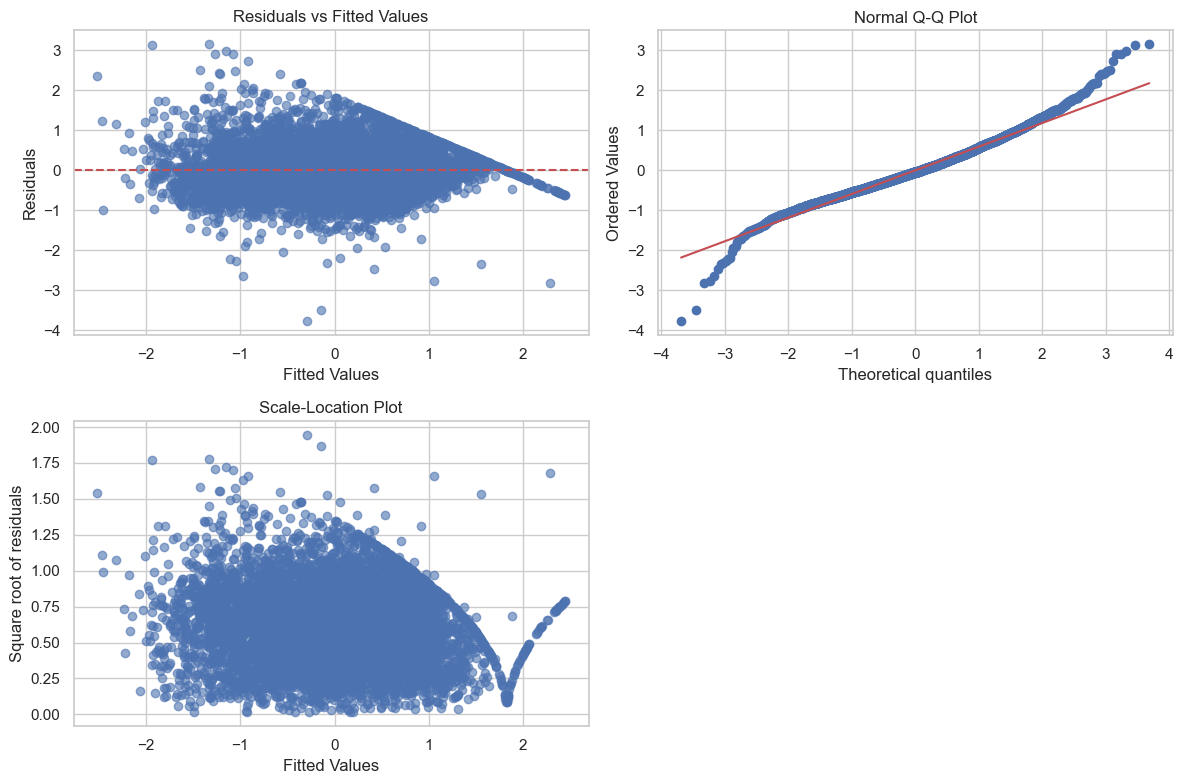

In [46]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_pred3.flatten(), residuals3.values.flatten(), color="b", alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

plt.subplot(2, 2, 2)
stats.probplot(residuals3.values.flatten(), dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

plt.subplot(2, 2, 3)
plt.scatter(y_pred3.flatten(), np.sqrt(np.abs(residuals3.values.flatten())), color="b", alpha=0.6)
plt.title("Scale-Location Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Square root of residuals")

plt.tight_layout()
plt.show()

## Regression Trees 

In [47]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154,NEAR BAY


In [48]:
dummies = pd.get_dummies(df['ocean_proximity'], drop_first=False)
df_dummies = df.join(dummies).drop('ocean_proximity', axis=1)
df_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154,0,0,0,1,0


In [49]:
X = df_dummies.drop('median_house_value', axis=1)
y = df_dummies['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

preds = tree_model.predict(X_train)
training_mse = mean_squared_error(y_train, preds)
print(f'Training MSE: {training_mse:.3f}')

y_pred = tree_model.predict(X_test)

tree_mse = mean_squared_error(y_test, y_pred)
tree_mae = mean_absolute_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)

print(f"Mean Squared Error: {tree_mse:.3f}")
print(f'Mean Absolute Error: {tree_mae:.3f}')
print(f'Root Mean Squared Error: {tree_rmse:.3f}')

Training MSE: 0.000
Mean Squared Error: 0.102
Mean Absolute Error: 0.217
Root Mean Squared Error: 0.319


### The model is overfitted 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(random_state=42)
param_grid = {'ccp_alpha': [0.0002, 0.0003, 0.0004]}

grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['ccp_alpha']
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Best alpha: {best_alpha}')
print(f'Mean Squared Error (Best Model): {mse_best}')

Best alpha: 0.0002
Mean Squared Error (Best Model): 0.08721762688614651


In [52]:
tree_model = DecisionTreeRegressor(ccp_alpha = 0.0002)
tree_model.fit(X_train, y_train)

preds = tree_model.predict(X_train)
training_mse = mean_squared_error(y_train, preds)
print(f'Training MSE: {training_mse:.3f}')

y_pred = tree_model.predict(X_test)

tree_mse = mean_squared_error(y_test, y_pred)
tree_mae = mean_absolute_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)

print(f"Test MSE : {tree_mse:.3f}")
print(f'Mean Absolute Error: {tree_mae:.3f}')
print(f'Root Mean Squared Error: {tree_rmse:.3f}')

Training MSE: 0.073
Test MSE : 0.087
Mean Absolute Error: 0.216
Root Mean Squared Error: 0.295


In [53]:
tree_score = tree_model.score(X_test, y_test)
print("R squared:", tree_score)

R squared: 0.738496146970226


## Random Forests 

In [54]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154,NEAR BAY


In [55]:
dummies = pd.get_dummies(df['ocean_proximity'], drop_first=False)
df_dummies = df.join(dummies).drop('ocean_proximity', axis=1)
X = df_dummies.drop('median_house_value', axis=1)
y = df_dummies['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=365)

In [56]:
forest = RandomForestRegressor()

forest_fit = forest.fit(X_train, y_train)

In [57]:
y_pred = forest.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_mae = mean_absolute_error(y_test, y_pred)
forest_rmse = np.mean(forest_mse)

print(f'Mean Squared Error: {forest_mse:.3f}')
print(f'Mean Absolute Error: {forest_mae:.3f}')
print(f'Root Mean Squared Error: {forest_rmse:.3f}')

Mean Squared Error: 0.053
Mean Absolute Error: 0.160
Root Mean Squared Error: 0.053


In [58]:
df_dummies['median_house_value'].describe()

count    20433.000000
mean        12.084869
std          0.569218
min          9.615805
25%         11.691080
50%         12.099050
75%         12.486356
max         13.122367
Name: median_house_value, dtype: float64

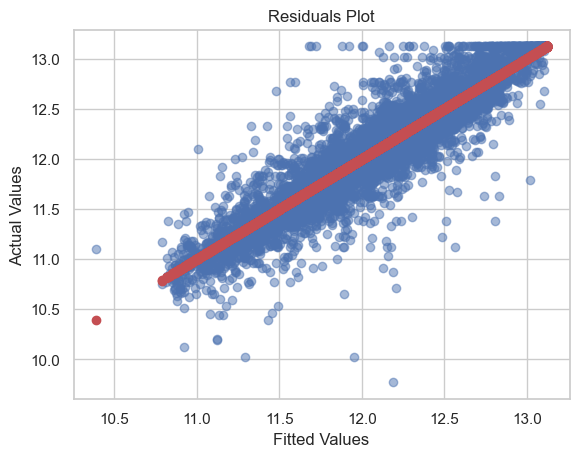

In [59]:
sns.set(style="whitegrid")

plt.scatter(y_pred, y_test, alpha=0.5)
plt.scatter(y_pred, y_pred, c='r')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Values')
plt.title('Residuals Plot')
plt.show()

In [60]:
results = pd.DataFrame({'Predicted':np.round(y_pred),'Actual':y_test,'Residuals': y_pred-y_test,'Abs.Difference':np.abs(y_pred-y_test)})
results.sort_values(by='Abs.Difference', ascending=False)

,Predicted,Actual,Residuals,Abs.Difference
5887,12.0,9.770013,2.422144e+00,2.422144e+00
1825,12.0,10.021315,1.928715e+00,1.928715e+00
11219,12.0,10.714440,1.493415e+00,1.493415e+00
4548,13.0,11.119898,1.445530e+00,1.445530e+00
10454,12.0,13.122367,-1.441342e+00,1.441342e+00
...,...,...,...,...
8794,13.0,13.122367,2.131628e-14,2.131628e-14
5250,13.0,13.122367,2.131628e-14,2.131628e-14
18341,13.0,13.122367,2.131628e-14,2.131628e-14
5279,13.0,13.122367,1.953993e-14,1.953993e-14


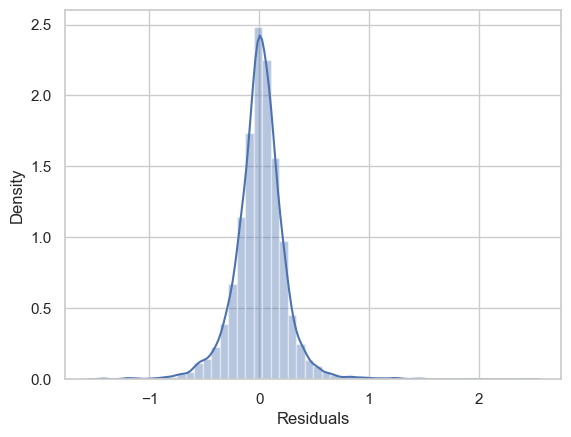

In [61]:
sns.distplot(results['Residuals'])
plt.show()

In [62]:
results['Abs.Difference'].describe()

count    6.130000e+03
mean     1.596135e-01
std      1.665636e-01
min      1.598721e-14
25%      5.081495e-02
50%      1.140760e-01
75%      2.130404e-01
max      2.422144e+00
Name: Abs.Difference, dtype: float64

### Feature Importance 

               Feature  Importance
7        median_income    0.354754
9               INLAND    0.314087
1             latitude    0.104886
0            longitude    0.093759
2   housing_median_age    0.034770
5           population    0.030817
3          total_rooms    0.022814
4       total_bedrooms    0.019911
6           households    0.017412
12          NEAR OCEAN    0.003499
8            <1H OCEAN    0.002509
11            NEAR BAY    0.000578
10              ISLAND    0.000204


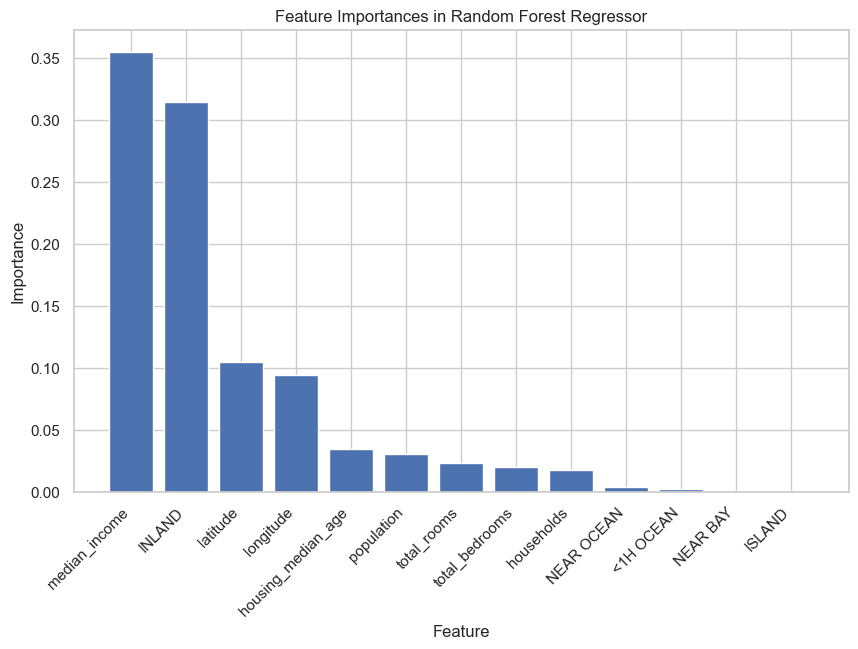

In [63]:
feature_importances = forest.feature_importances_

feature_importance_df = pd.DataFrame(
    {'Feature': X.columns, 'Importance': feature_importances}
)

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest Regressor')
plt.xticks(rotation=45, ha='right')
plt.show()

### The most important feature in predicting house prices is 'median_income' with an importance score of approximately 35.15%. This suggests that the median income of an area is a key factor in determining housing prices.

### The features 'latitude' and 'longitude' also have notable importance scores (around 10.47% and 9.35%, respectively). This indicates that the geographical coordinates of the area contribute significantly to the model's predictions.

### housing_median_age' is a moderately important feature, contributing around 3.51% to the model. This suggests that the median age of housing units in an area has a modest impact on predicting house prices.

### Hyperparameter Tuning

In [65]:
rf_model = RandomForestRegressor()

param_grid = {
    'max_depth': [None,2],
    'max_features': [1.0,'sqrt']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_features': 1.0}


In [66]:
best_model = grid_search.best_estimator_

forest_score = best_model.score(X_test, y_test)
print("R squared:", forest_score)

R squared: 0.8326795522339969


In [67]:
y_pred = best_model.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_mae = mean_absolute_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)

print(f'Mean Squared Error: {forest_mse:.4f}')
print(f'Mean Absolute Error: {forest_mae:.4f}')
print(f'Root Mean Squared Error: {forest_rmse:.3f}')

Mean Squared Error: 0.0535
Mean Absolute Error: 0.1594
Root Mean Squared Error: 0.231


## Gradient Boosting Regression

In [68]:
df_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,13.022766,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,12.789687,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,12.771673,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,12.740520,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,12.743154,0,0,0,1,0


In [69]:
grad = GradientBoostingRegressor()

In [70]:
grad_reg = grad.fit(X_train, y_train)

In [71]:
score = grad_reg.score(X_test, y_test)
score

0.7852393871435677

In [72]:
y_pred = grad_reg.predict(X_test)
grad_mse = mean_squared_error(y_test, y_pred)
grad_mae = mean_absolute_error(y_test, y_pred)
grad_rmse = np.sqrt(grad_mse)

print(f'Mean Squared Error: {grad_mse:.3f}')
print(f'Mean Absolute Error: {grad_mae:.3f}')
print(f'Root Mean Squared Error: {grad_rmse:.3f}')

Mean Squared Error: 0.069
Mean Absolute Error: 0.195
Root Mean Squared Error: 0.262


In [73]:
param_grid = {'n_estimators': [100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1],
             }

grid_search = GridSearchCV(estimator=grad_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [74]:
best_model = grid_search.best_estimator_

grad_score = best_model.score(X_test, y_test)
print("R squared:", grad_score)

R squared: 0.8129374287977174


In [75]:
y_pred = best_model.predict(X_test)
grad_mse = mean_squared_error(y_test, y_pred)
grad_mae = mean_absolute_error(y_test, y_pred)
grad_rmse = np.sqrt(grad_mse)

print(f'Mean Squared Error: {grad_mse:.4f}')
print(f'Mean Absolute Error: {grad_mae:.4f}')
print(f'Root Mean Squared Error: {grad_rmse:.3f}')

Mean Squared Error: 0.0599
Mean Absolute Error: 0.1796
Root Mean Squared Error: 0.245


### Models Comparison

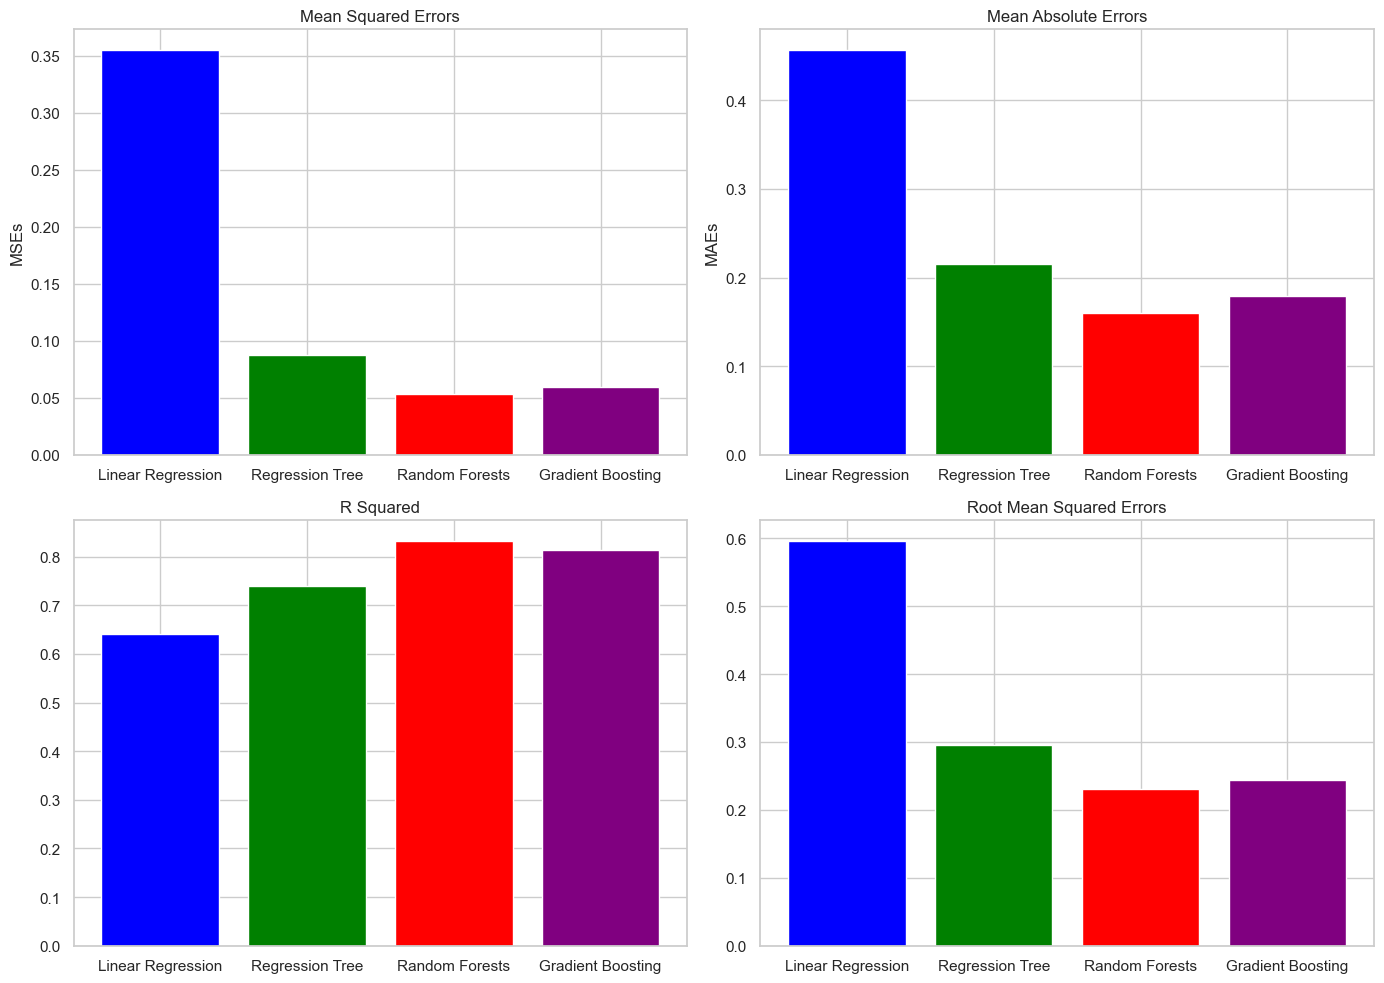

In [76]:
models = ['Linear Regression','Regression Tree','Random Forests','Gradient Boosting']
mse_values = [reg3_mse, tree_mse, forest_mse, grad_mse]
mae_values = [reg3_mae, tree_mae, forest_mae, grad_mae]
rmse_values = [reg3_rmse, tree_rmse, forest_rmse, grad_rmse]
scores = [reg_score, tree_score, forest_score, grad_score]

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green', 'red','purple'])
plt.ylabel('MSEs')
plt.title('Mean Squared Errors')

plt.subplot(2, 2, 2)
plt.bar(models, mae_values, color=['blue', 'green', 'red','purple'])
plt.ylabel('MAEs')
plt.title('Mean Absolute Errors')

plt.subplot(2,2,3)
plt.bar(models, scores, color=['blue','green','red','purple'])
plt.title('R Squared')

plt.subplot(2,2,4)
plt.bar(models, rmse_values, color=['blue','green','red','purple'])
plt.title('Root Mean Squared Errors')

plt.tight_layout()
plt.show()

### It is clear that random forests has the best performance in comparison with linear regression ,regression trees and gradient boosting in every metric we chose. It has lower mean squared error and lower mean absolute error too